#### STATE DATA (OPTIONAL)

We often take data for granted. However, one of the hardest parts about analyzing a problem you're interested in can be to find good data to answer the questions you want to ask. As you're learning R, though, there are many datasets that R has built in that you can take advantage of.

In this problem, we will be examining the "state" dataset, which has data from the 1970s on all fifty US states. For each state, the dataset includes the population, per capita income, illiteracy rate, murder rate, high school graduation rate, average number of frost days, area, latitude and longitude, division the state belongs to,  region the state belongs to, and two-letter abbreviation.

Load the dataset with read_csv() and convert it to a data frame.

This dataset has 50 observations (one for each US state)

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn import datasets, linear_model, metrics

#import itertools
#import pandas_datareader.data as pdweb
#from pandas_datareader.data import DataReader
#from datetime import datetime
#from io import StringIO

In [2]:
statedata = pd.read_csv('../data/statedata.csv')
statedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
Population        50 non-null int64
Income            50 non-null int64
Illiteracy        50 non-null float64
Life.Exp          50 non-null float64
Murder            50 non-null float64
HS.Grad           50 non-null float64
Frost             50 non-null int64
Area              50 non-null int64
state.abb         50 non-null object
state.area        50 non-null int64
x                 50 non-null float64
y                 50 non-null float64
state.division    50 non-null object
state.name        50 non-null object
state.region      50 non-null object
dtypes: float64(6), int64(5), object(4)
memory usage: 5.9+ KB


#### Explore the data

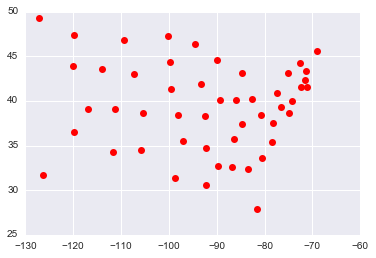

In [3]:
# X,Y are coordinates? Then the plot should look like a USA map!
plt.plot(statedata['x'],statedata['y'],'ro')

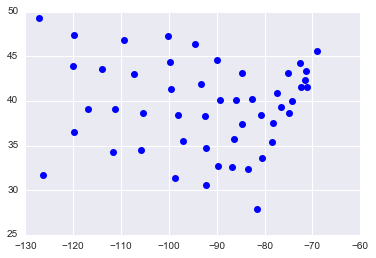

In [4]:
# It would be really cool if we could overlay this with an actual USA map
plt.plot(statedata['x'],statedata['y'],'bo')

In [5]:
# which region of the US (West, North Central, South, or Northeast) has the highest average high school graduation
# rate of all the states in the region?

statedata.groupby('state.region')['HS.Grad'].mean()

state.region
North Central    54.516667
Northeast        53.966667
South            44.343750
West             62.000000
Name: HS.Grad, dtype: float64

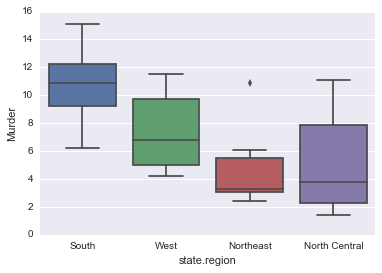

In [6]:
sns.boxplot(x='state.region',y='Murder',data=statedata)

In [7]:
# What state is that outlier in the Northeast region?

statedata['Murder'].max()

15.1

In [8]:
statedata[statedata['state.region']=='Northeast']['Murder']

6      3.1
18     2.7
20     3.3
28     3.3
29     5.2
31    10.9
37     6.1
38     2.4
44     5.5
Name: Murder, dtype: float64

In [9]:
statedata.loc[31,['state.region','state.name']]

state.region    Northeast
state.name       New York
Name: 31, dtype: object

#### Linear Model
We would like to build a model to predict life expectancy by state using the state statistics we have.

Build the model with all potential variables included (Population, Income, Illiteracy, Murder, HS.Grad, Frost, and Area). Note: use the variable "Area", NOT the variable "state.area".

What is the coefficient for "Income" in the linear regression model?

In [10]:
# First we need to clean up column names

statedata.columns

Index(['Population', 'Income', 'Illiteracy', 'Life.Exp', 'Murder', 'HS.Grad',
       'Frost', 'Area', 'state.abb', 'state.area', 'x', 'y', 'state.division',
       'state.name', 'state.region'],
      dtype='object')

In [11]:
statedata.columns = ['Population', 'Income', 'Illiteracy', 'Life_Exp', 'Murder', 'HS_Grad',
       'Frost', 'Area', 'state_abb', 'state_area', 'x', 'y', 'state_division',
       'state_name', 'state_region']
statedata[:3]

,Population,Income,Illiteracy,Life_Exp,Murder,HS_Grad,Frost,Area,state_abb,state_area,x,y,state_division,state_name,state_region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West


In [12]:
LinReg = smf.ols(formula='Life_Exp ~ Population + Income + Illiteracy + Murder + HS_Grad + Frost + Area',data=statedata).fit()
LinReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Life_Exp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     16.74
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           2.53e-10
Time:                        15:59:36   Log-Likelihood:                -51.855
No. Observations:                  50   AIC:                             119.7
Df Residuals:                      42   BIC:                             135.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     70.9432      1.748     40.586      0.000        67.416    74.471
Population   5.18e-05   2.92e-05      1.775      0.083      -7.1e-06     0.000
Income      -2.18e-05      0.000     -0.089      0.929        -0.001     0.000
Illiteracy     0.0338      0.366      0.092      0.927        -0.705     0.773
Murder        -0.3011      0.047     -6.459      0.000        -0.395    -0.207
HS_Grad        0.0489      0.023      2.098      0.042         0.002     0.096
Frost         -0.0057      0.003     -1.825      0.075        -0.012     0.001
Area       -7.383e-08   1.67e-06     -0.044      0.965     -3.44e-06  3.29e-06
==============================================================================
Omnibus:                        2.385   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.420
Skew:                          -0.081   Prob(JB):                        0.492
Kurtosis:                       2.190   Cond. No.                     1.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

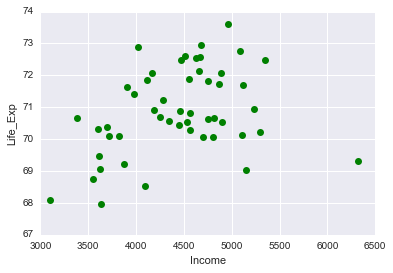

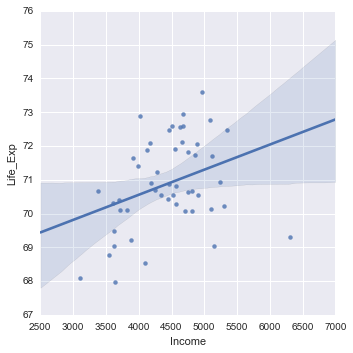

In [13]:
# Look, the income coefficient is negative. The higher the income, the lower your life expectancy? Weird.

plt.plot(statedata['Income'], statedata['Life_Exp'],'go')
plt.xlabel('Income')
plt.ylabel('Life_Exp')

sns.lmplot('Income', 'Life_Exp', data=statedata)

#### # Now do "backwards variable selection"

Use the significance of the coefficients to decide which variables to remove (remove the one with the largest "p-value" first, or the one with the "t value" closest to zero), and to remove them one at a time

In [14]:
# Step 0: We had 7 independent vars in our model. Let's remove some.
# Step 1: Looks like 'Area' has the highest P Value.  Remove it and re-fit.
# Step 2: Now 'Illiteracy' has the highest.  Remove it and re-fit.
# Step 3: Now 'Income' has the highest.  Remove it and re-fit.

LinReg = smf.ols(formula='Life_Exp ~ Population + Murder + HS_Grad + Frost',data=statedata).fit()
LinReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Life_Exp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     31.37
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           1.70e-12
Time:                        15:59:37   Log-Likelihood:                -51.866
No. Observations:                  50   AIC:                             113.7
Df Residuals:                      45   BIC:                             123.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     71.0271      0.953     74.542      0.000        69.108    72.946
Population  5.014e-05   2.51e-05      1.996      0.052     -4.54e-07     0.000
Murder        -0.3001      0.037     -8.199      0.000        -0.374    -0.226
HS_Grad        0.0466      0.015      3.142      0.003         0.017     0.076
Frost         -0.0059      0.002     -2.455      0.018        -0.011    -0.001
==============================================================================
Omnibus:                        2.444   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.426
Skew:                          -0.065   Prob(JB):                        0.490
Kurtosis:                       2.183   Cond. No.                     5.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
Pred = LinReg.predict(statedata)
Pred

array([ 68.48111866,  69.85740399,  71.41415671,  69.57373881,
        71.79564599,  71.10354184,  72.03458972,  71.12646884,
        70.61539495,  68.63694227,  72.09316854,  71.49989286,
        70.1924416 ,  70.90158526,  72.39652876,  71.90351963,
        69.24417933,  69.15044846,  71.86095411,  70.51851996,
        72.44105391,  69.8689336 ,  72.2655962 ,  69.00535384,
        70.10610031,  71.40024805,  72.17032309,  69.52482393,
        71.72635615,  71.59612086,  70.03119055,  70.62937149,
        69.28624179,  71.8764945 ,  71.08548767,  71.15860042,
        72.41445333,  71.38045527,  71.76007018,  69.06109172,
        72.01160881,  69.46583349,  69.97885943,  72.05753183,
        71.06134981,  70.14691392,  72.68272426,  70.44982588,
        72.00995676,  70.87678863])

In [16]:
Pred_dict = {'state':statedata.state_name,'Pred_Life_Exp':Pred}
Predictions = pd.DataFrame(Pred_dict)
Predictions.head()

,Pred_Life_Exp,state
0,68.481119,Alabama
1,69.857404,Alaska
2,71.414157,Arizona
3,69.573739,Arkansas
4,71.795646,California


In [17]:
# Which state do we predict to have the lowest life expectancy?

Predictions[Predictions['Pred_Life_Exp'] == Predictions['Pred_Life_Exp'].min()]

,Pred_Life_Exp,state
0,68.481119,Alabama


In [18]:
statedata[statedata['Life_Exp'] == statedata['Life_Exp'].min()][['Life_Exp','state_name']]

,Life_Exp,state_name
39,67.96,South Carolina


In [19]:
# Which state do we predict to have the highest life expectancy?

Predictions[Predictions['Pred_Life_Exp'] == Predictions['Pred_Life_Exp'].max()]

,Pred_Life_Exp,state
46,72.682724,Washington


In [20]:
statedata[statedata['Life_Exp'] == statedata['Life_Exp'].max()][['Life_Exp','state_name']]

,Life_Exp,state_name
10,73.6,Hawaii


In [22]:
LinReg.resid

0     0.568881
1    -0.547404
2    -0.864157
3     1.086261
4    -0.085646
5     0.956458
6     0.445410
7    -1.066469
8     0.044605
9    -0.096942
10    1.506831
11    0.370107
12   -0.052442
13   -0.021585
14    0.163471
15    0.676480
16    0.855821
17   -0.390448
18   -1.470954
19   -0.298520
20   -0.611054
21    0.761066
22    0.694404
23   -0.915354
24    0.583900
25   -0.840248
26    0.429677
27   -0.494824
28   -0.496356
29   -0.666121
30    0.288809
31   -0.079371
32   -0.076242
33    0.903506
34   -0.265488
35    0.261400
36   -0.284453
37   -0.950455
38    0.139930
39   -1.101092
40    0.068391
41    0.644167
42    0.921141
43    0.842468
44    0.578650
45   -0.066914
46   -0.962724
47   -0.969826
48    0.470043
49   -0.586789
dtype: float64

In [27]:
Resid_dict = {'state':statedata.state_name,'Abs_resid': np.abs(LinReg.resid)}
Residuals = pd.DataFrame(Resid_dict)
Residuals.head()

,Abs_resid,state
0,0.568881,Alabama
1,0.547404,Alaska
2,0.864157,Arizona
3,1.086261,Arkansas
4,0.085646,California


In [29]:
# Which state has the lowest residuals (the difference between the predicted and actual values)?

Residuals[Residuals['Abs_resid'] == Residuals['Abs_resid'].min()]

,Abs_resid,state
13,0.021585,Indiana


In [30]:
# For which state do we make the largest absolute error?

Residuals[Residuals['Abs_resid'] == Residuals['Abs_resid'].max()]

,Abs_resid,state
10,1.506831,Hawaii
